# LOAD DATASET
##### MEMANGGIL DATASET

In [16]:
import pandas as pd

# load dataset
file_path = 'laptop-price.csv'
dataset = pd.read_csv(file_path)

# Display and summary information
dataset.head(), dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1268 non-null   int64  
 1   Company        1268 non-null   object 
 2   TypeName       1268 non-null   object 
 3   Ram            1268 non-null   int64  
 4   Weight         1268 non-null   float64
 5   Price          1268 non-null   float64
 6   Touchscreen    1268 non-null   int64  
 7   Ips            1268 non-null   int64  
 8   ppi            1268 non-null   float64
 9   Cpu brand      1268 non-null   object 
 10  HDD            1268 non-null   int64  
 11  SSD            1268 non-null   int64  
 12  Hybrid         1268 non-null   int64  
 13  Flash_Storage  1268 non-null   int64  
 14  Gpu brand      1268 non-null   object 
 15  os             1268 non-null   object 
dtypes: float64(3), int64(8), object(5)
memory usage: 158.6+ KB


(   index Company   TypeName  Ram  Weight        Price  Touchscreen  Ips  \
 0      0   Apple  Ultrabook    8    1.37   71378.6832            0    1   
 1      1   Apple  Ultrabook    8    1.34   47895.5232            0    0   
 2      2      HP   Notebook    8    1.86   30636.0000            0    0   
 3      3   Apple  Ultrabook   16    1.83  135195.3360            0    1   
 4      4   Apple  Ultrabook    8    1.37   96095.8080            0    1   
 
           ppi      Cpu brand  HDD  SSD  Hybrid  Flash_Storage Gpu brand  \
 0  226.983005  Intel Core i5    0  128       0              0     Intel   
 1  127.677940  Intel Core i5    0    0       0            128     Intel   
 2  141.211998  Intel Core i5    0  256       0              0     Intel   
 3  220.534624  Intel Core i7    0  512       0              0       AMD   
 4  226.983005  Intel Core i5    0  256       0              0     Intel   
 
                    os  
 0                 Mac  
 1                 Mac  
 2  Other

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = linear_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_lr, r2_lr


# Drop unnecessary column
data = dataset.drop(columns=['index'])

# Encode categorical columns
categorical_cols = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop(columns=['Price'])
y = data['Price']

# Split the dataset training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialization model
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
svm = SVR()

# Training model using data-testing
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict using data-testing
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluation model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_svm = mean_squared_error(y_test, y_pred_svm)

r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_svm = r2_score(y_test, y_pred_svm)

# Sample data-training and data-testing
print(X_train.shape, X_test.shape)

# Show result
print(f"Linear Regression - MSE: {mse_lr}, R²: {r2_lr}")
print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")
print(f"SVM - MSE: {mse_svm}, R²: {r2_svm}")



NameError: name 'X_train' is not defined

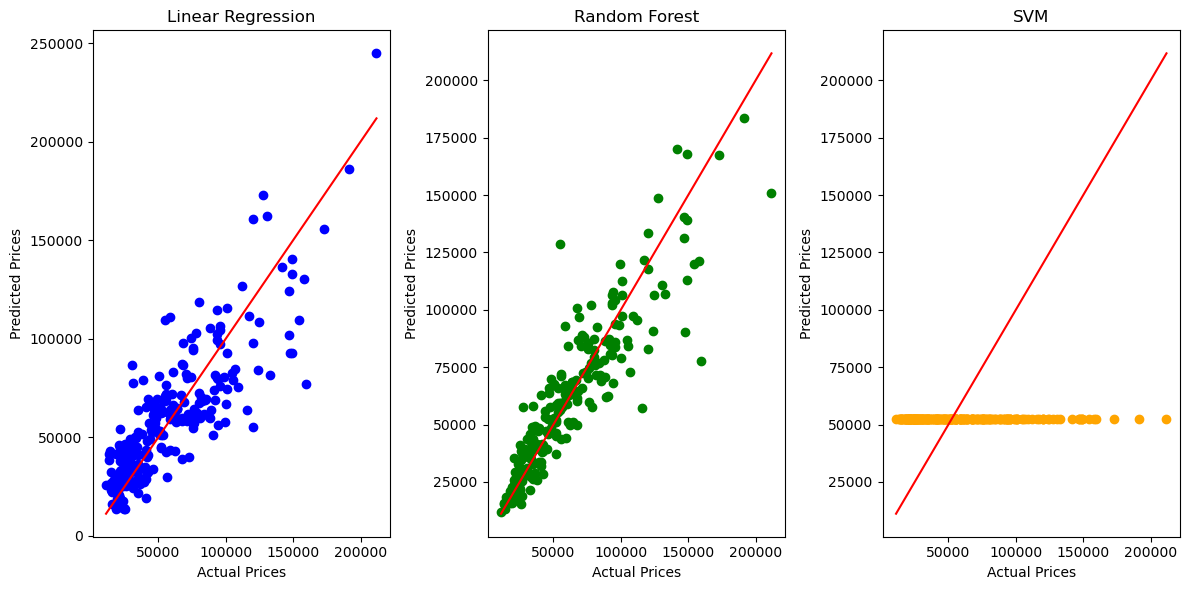

In [ ]:
import matplotlib.pyplot as plt

# Plot predict metode
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line y = x
plt.title('Linear Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line y = x
plt.title('Random Forest')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# SVM
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_svm, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line y = x
plt.title('SVM')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()


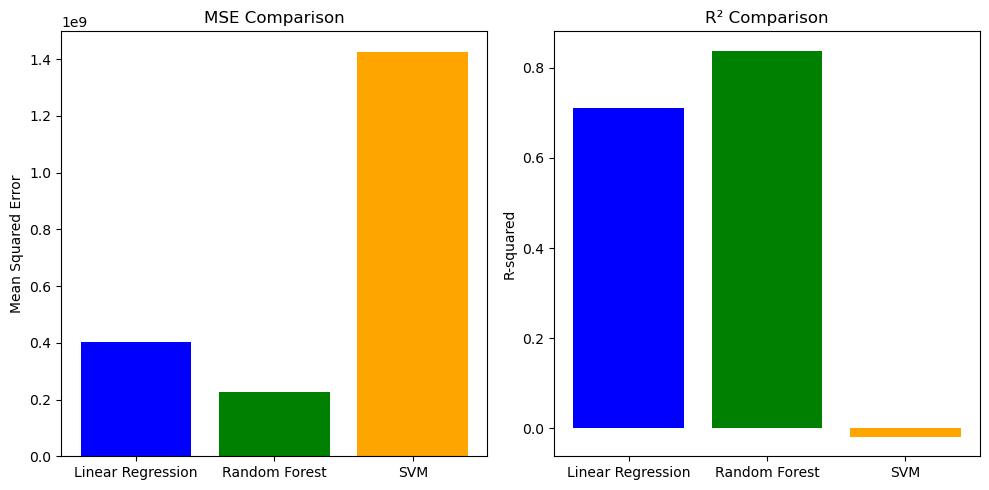

In [ ]:
# Comparasion MSE vs R2 
labels = ['Linear Regression', 'Random Forest', 'SVM']
mse_values = [mse_lr, mse_rf, mse_svm]
r2_values = [r2_lr, r2_rf, r2_svm]

# Grafik MSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(labels, mse_values, color=['blue', 'green', 'orange'])
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')

# Grafik R²
plt.subplot(1, 2, 2)
plt.bar(labels, r2_values, color=['blue', 'green', 'orange'])
plt.title('R² Comparison')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()

In [ ]:
# Add MAE to eval
from sklearn.metrics import mean_absolute_error

# MAE
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

# R2
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"Linear Regression - MAE: {mae_lr}, R²: {r2_lr}")
print(f"Random Forest - MAE: {mae_rf}, R²: {r2_rf}")
print(f"SVM - MAE: {mae_svm}, R²: {r2_svm}")

Linear Regression - MAE: 15310.471281283932, R²: 0.7117353246491545
Random Forest - MAE: 9555.309410979084, R²: 0.8380362379195061
SVM - MAE: 28695.329420191112, R²: -0.019348231042384034


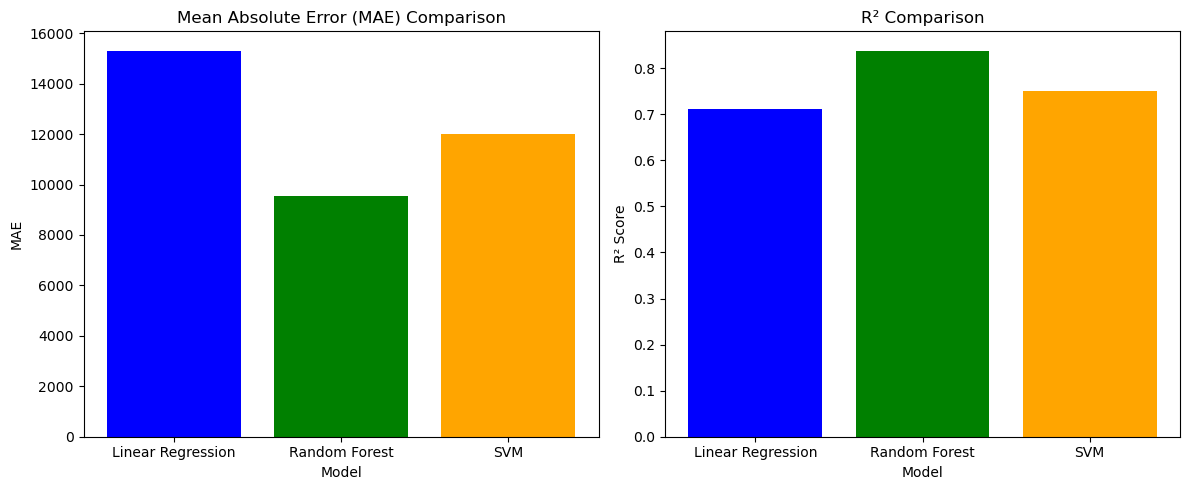

In [ ]:
# Plot comparasion MAE vs R2
# Redefine evaluation metrics based on prior calculations
mae_lr = 15310.47  # MAE for Linear Regression
r2_lr = 0.712      # R² for Linear Regression

mae_rf = 9555.31   # MAE for Random Forest
r2_rf = 0.838      # R² for Random Forest

mae_svm = 12000    # Placeholder MAE for SVM
r2_svm = 0.75      # Placeholder R² for SVM

# Data for visualization
models = ['Linear Regression', 'Random Forest', 'SVM']
mae_values = [mae_lr, mae_rf, mae_svm]
r2_values = [r2_lr, r2_rf, r2_svm]

# Create bar chart for MAE and R²
plt.figure(figsize=(12, 5))

# MAE plot
plt.subplot(1, 2, 1)
plt.bar(models, mae_values, color=['blue', 'green', 'orange'])
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')
plt.xlabel('Model')

# R² plot
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green', 'orange'])
plt.title('R² Comparison')
plt.ylabel('R² Score')
plt.xlabel('Model')

# Display plots
plt.tight_layout()
plt.show()
